# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Tiket.com_1.csv")
df.head()

,userName,score,at,content
0,Ni'matul Hidayah,3,2024-07-05 11:13:28,"Baru instal lagi aplilasi ini, tapi tiba tiba ..."
1,azmi bws,1,2024-07-05 09:52:15,"Lebih baik uninstal, saya pesan hotel jam 10 p..."
2,Revira Mamesah,5,2024-07-05 08:47:26,"sejauh ini, bagus dan top,, membantu sekali, s..."
3,Teja Ahmad Nurnantian,5,2024-07-05 08:08:43,Baik
4,Martabax Manis,1,2024-07-05 06:26:52,Disuruh menilai atas nama Siti Maharani dalam ...


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,"Baru instal lagi aplilasi ini, tapi tiba tiba ..."
1,"Lebih baik uninstal, saya pesan hotel jam 10 p..."
2,"sejauh ini, bagus dan top,, membantu sekali, s..."
3,Baik
4,Disuruh menilai atas nama Siti Maharani dalam ...
...,...
1995,sangat membantu sekali aplikasi ini
1996,Sangat membantu
1997,fungsional
1998,Gak enak banyak sponsor gak asik asu


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2000
unique,1604
top,mantap
freq,51


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2000, 1)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1604, 1)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,"Baru instal lagi aplilasi ini, tapi tiba tiba ...",baru instal lagi aplilasi ini tapi tiba tiba d...
1,"Lebih baik uninstal, saya pesan hotel jam 10 p...",lebih baik uninstal saya pesan hotel jam pagi...
2,"sejauh ini, bagus dan top,, membantu sekali, s...",sejauh ini bagus dan top membantu sekali semak...
3,Baik,baik
4,Disuruh menilai atas nama Siti Maharani dalam ...,disuruh menilai atas nama siti maharani dalam ...
...,...,...
1993,"Keren, tolong reschedule bisa di lakukan 2kali",keren tolong reschedule bisa di lakukan kali
1994,"bagus,di tingkat lebih bnyk promo",bagusdi tingkat lebih bnyk promo
1995,sangat membantu sekali aplikasi ini,sangat membantu sekali aplikasi ini
1997,fungsional,fungsional


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "gbs" : "gabisa",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,"Baru instal lagi aplilasi ini, tapi tiba tiba ...",baru instal lagi aplilasi ini tapi tiba tiba d...,baru instal lagi aplilasi ini tapi tiba tiba d...
1,"Lebih baik uninstal, saya pesan hotel jam 10 p...",lebih baik uninstal saya pesan hotel jam pagi...,lebih baik uninstal saya pesan hotel jam pagi...
2,"sejauh ini, bagus dan top,, membantu sekali, s...",sejauh ini bagus dan top membantu sekali semak...,sejauh ini bagus dan top membantu sekali semak...
3,Baik,baik,baik
4,Disuruh menilai atas nama Siti Maharani dalam ...,disuruh menilai atas nama siti maharani dalam ...,disuruh menilai atas nama siti maharani dalam ...
...,...,...,...
1993,"Keren, tolong reschedule bisa di lakukan 2kali",keren tolong reschedule bisa di lakukan kali,keren tolong reschedule bisa di lakukan kali
1994,"bagus,di tingkat lebih bnyk promo",bagusdi tingkat lebih bnyk promo,bagusdi tinggaat lebih bnyk promo
1995,sangat membantu sekali aplikasi ini,sangat membantu sekali aplikasi ini,sangat membantu sekali aplikasi ini
1997,fungsional,fungsional,fungsional


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "bisa", "ga",
                   "udah", "tapi", "sudah", "gak", "lagi", "sama", "lebih"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,"Baru instal lagi aplilasi ini, tapi tiba tiba ...",baru instal lagi aplilasi ini tapi tiba tiba d...,baru instal lagi aplilasi ini tapi tiba tiba d...,baru instal aplilasi tapi tiba tiba disuruh ng...
1,"Lebih baik uninstal, saya pesan hotel jam 10 p...",lebih baik uninstal saya pesan hotel jam pagi...,lebih baik uninstal saya pesan hotel jam pagi...,baik uninstal pesan hotel jam pagi mau chekin...
2,"sejauh ini, bagus dan top,, membantu sekali, s...",sejauh ini bagus dan top membantu sekali semak...,sejauh ini bagus dan top membantu sekali semak...,sejauh bagus top membantu semakin bagusin fasi...
3,Baik,baik,baik,baik
4,Disuruh menilai atas nama Siti Maharani dalam ...,disuruh menilai atas nama siti maharani dalam ...,disuruh menilai atas nama siti maharani dalam ...,disuruh menilai atas nama siti maharani dalam ...
...,...,...,...,...
1993,"Keren, tolong reschedule bisa di lakukan 2kali",keren tolong reschedule bisa di lakukan kali,keren tolong reschedule bisa di lakukan kali,keren tolong reschedule di lakukan kali
1994,"bagus,di tingkat lebih bnyk promo",bagusdi tingkat lebih bnyk promo,bagusdi tinggaat lebih bnyk promo,bagusdi tinggaat bnyk promo
1995,sangat membantu sekali aplikasi ini,sangat membantu sekali aplikasi ini,sangat membantu sekali aplikasi ini,membantu aplikasi
1997,fungsional,fungsional,fungsional,fungsional


# **Tokenize**

In [18]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,"Baru instal lagi aplilasi ini, tapi tiba tiba ...",baru instal lagi aplilasi ini tapi tiba tiba d...,baru instal lagi aplilasi ini tapi tiba tiba d...,baru instal aplilasi tapi tiba tiba disuruh ng...,"[baru, instal, aplilasi, tapi, tiba, tiba, dis..."
1,"Lebih baik uninstal, saya pesan hotel jam 10 p...",lebih baik uninstal saya pesan hotel jam pagi...,lebih baik uninstal saya pesan hotel jam pagi...,baik uninstal pesan hotel jam pagi mau chekin...,"[baik, uninstal, pesan, hotel, jam, pagi, mau,..."
2,"sejauh ini, bagus dan top,, membantu sekali, s...",sejauh ini bagus dan top membantu sekali semak...,sejauh ini bagus dan top membantu sekali semak...,sejauh bagus top membantu semakin bagusin fasi...,"[sejauh, bagus, top, membantu, semakin, bagusi..."
3,Baik,baik,baik,baik,[baik]
4,Disuruh menilai atas nama Siti Maharani dalam ...,disuruh menilai atas nama siti maharani dalam ...,disuruh menilai atas nama siti maharani dalam ...,disuruh menilai atas nama siti maharani dalam ...,"[disuruh, menilai, atas, nama, siti, maharani,..."
...,...,...,...,...,...
1993,"Keren, tolong reschedule bisa di lakukan 2kali",keren tolong reschedule bisa di lakukan kali,keren tolong reschedule bisa di lakukan kali,keren tolong reschedule di lakukan kali,"[keren, tolong, reschedule, di, lakukan, kali]"
1994,"bagus,di tingkat lebih bnyk promo",bagusdi tingkat lebih bnyk promo,bagusdi tinggaat lebih bnyk promo,bagusdi tinggaat bnyk promo,"[bagusdi, tinggaat, bnyk, promo]"
1995,sangat membantu sekali aplikasi ini,sangat membantu sekali aplikasi ini,sangat membantu sekali aplikasi ini,membantu aplikasi,"[membantu, aplikasi]"
1997,fungsional,fungsional,fungsional,fungsional,[fungsional]


# **Stemming**

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Tiket.com2_1.csv', index = False)


In [20]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Tiket.com2_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,baru instal aplilasi tapi tiba tiba suruh ngel...
1,baik uninstal pesan hotel jam pagi mau chekin ...
2,jauh bagus top bantu makin bagusin fasilitas s...
3,baik
4,suruh nilai atas nama siti maharani dalam grup...
...,...
1599,keren tolong reschedule di laku kali
1600,bagusdi tinggaat bnyk promo
1601,bantu aplikasi
1602,fungsional


# **Translate**

In [21]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Tiket.com2_1.csv', encoding = 'latin1')


In [24]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')
# df_values

In [27]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Tiket.com2_1.csv')

In [28]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Tiket.com2_1.csv', index_col=0)
df_values

,steamming,steamming_en
0,baru instal aplilasi tapi tiba tiba suruh ngel...,"just install the aplilation, but suddenly you'..."
1,baik uninstal pesan hotel jam pagi mau chekin ...,Both uninstall hotel messages at morning. Want...
2,jauh bagus top bantu makin bagusin fasilitas s...,"fontcolor="" # FFFF00""farthertophelptheproperty..."
3,baik,Okay.
4,suruh nilai atas nama siti maharani dalam grup...,order values in the name of maharani siti in g...
...,...,...
1599,keren tolong reschedule di laku kali,"fontcolor="" # FFFF00""cool fontcolor="" # FFFF00..."
1600,bagusdi tinggaat bnyk promo,It's good to be around a lot of promos.
1601,bantu aplikasi,help application
1602,fungsional,functional


# **Labeling**

In [29]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Tiket.com2_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,baru instal aplilasi tapi tiba tiba suruh ngel...,"just install the aplilation, but suddenly you'..."
1,baik uninstal pesan hotel jam pagi mau chekin ...,Both uninstall hotel messages at morning. Want...
2,jauh bagus top bantu makin bagusin fasilitas s...,"fontcolor="" # FFFF00""farthertophelptheproperty..."
3,baik,Okay.
4,suruh nilai atas nama siti maharani dalam grup...,order values in the name of maharani siti in g...
...,...,...
1599,keren tolong reschedule di laku kali,"fontcolor="" # FFFF00""cool fontcolor="" # FFFF00..."
1600,bagusdi tinggaat bnyk promo,It's good to be around a lot of promos.
1601,bantu aplikasi,help application
1602,fungsional,functional


In [30]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [31]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [32]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 766
Netral = 605
Negatif = 233

Total Data Seluruhnya : 1604


In [33]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,baru instal aplilasi tapi tiba tiba suruh ngel...,"just install the aplilation, but suddenly you'...",Negatif
1,baik uninstal pesan hotel jam pagi mau chekin ...,Both uninstall hotel messages at morning. Want...,Netral
2,jauh bagus top bantu makin bagusin fasilitas s...,"fontcolor="" # FFFF00""farthertophelptheproperty...",Netral
3,baik,Okay.,Positif
4,suruh nilai atas nama siti maharani dalam grup...,order values in the name of maharani siti in g...,Netral
...,...,...,...
1599,keren tolong reschedule di laku kali,"fontcolor="" # FFFF00""cool fontcolor="" # FFFF00...",Positif
1600,bagusdi tinggaat bnyk promo,It's good to be around a lot of promos.,Positif
1601,bantu aplikasi,help application,Netral
1602,fungsional,functional,Netral


In [34]:
# Mengimplementasikan Variabel data_final

data_final = df_values
data_final

,steamming,steamming_en,sentimen
0,baru instal aplilasi tapi tiba tiba suruh ngel...,"just install the aplilation, but suddenly you'...",Negatif
1,baik uninstal pesan hotel jam pagi mau chekin ...,Both uninstall hotel messages at morning. Want...,Netral
2,jauh bagus top bantu makin bagusin fasilitas s...,"fontcolor="" # FFFF00""farthertophelptheproperty...",Netral
3,baik,Okay.,Positif
4,suruh nilai atas nama siti maharani dalam grup...,order values in the name of maharani siti in g...,Netral
...,...,...,...
1599,keren tolong reschedule di laku kali,"fontcolor="" # FFFF00""cool fontcolor="" # FFFF00...",Positif
1600,bagusdi tinggaat bnyk promo,It's good to be around a lot of promos.,Positif
1601,bantu aplikasi,help application,Netral
1602,fungsional,functional,Netral


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



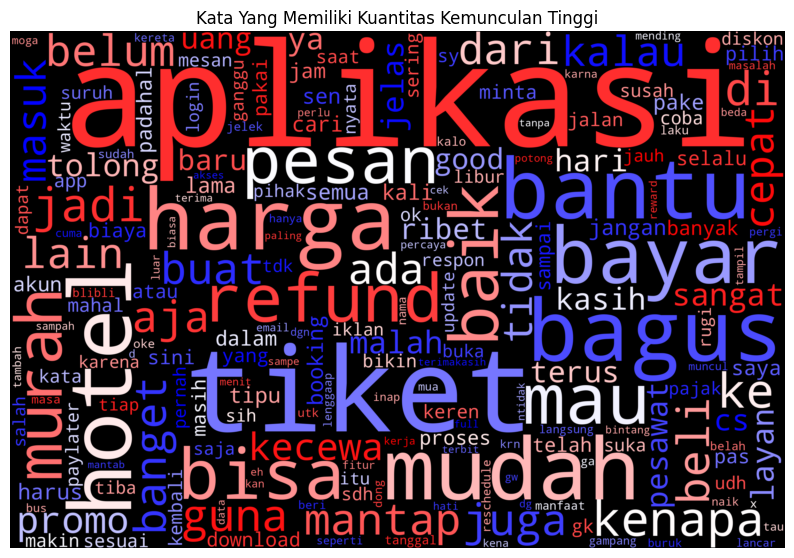

In [35]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


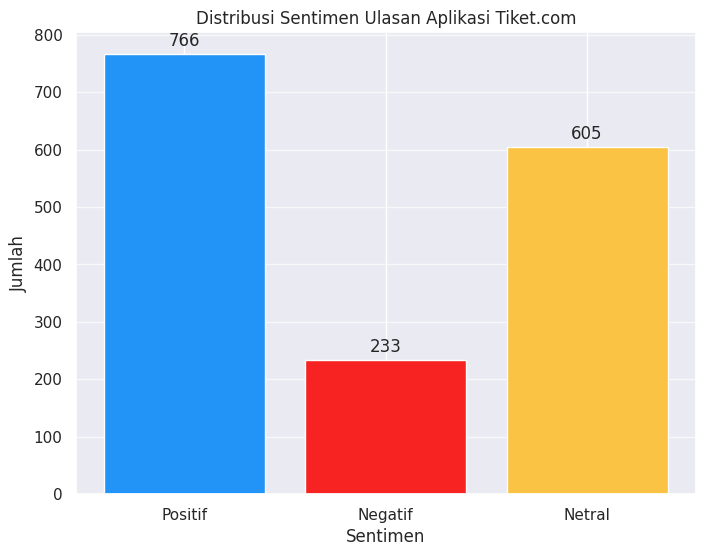

In [36]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Tiket.com")


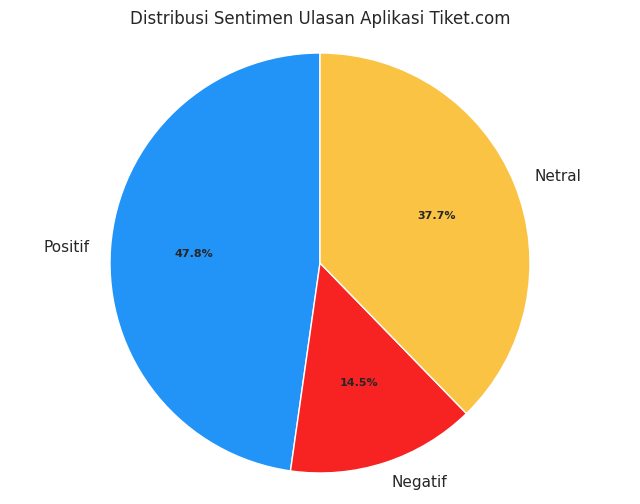

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Tiket.com")

In [38]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,baru instal aplilasi tapi tiba tiba suruh ngel...,"just install the aplilation, but suddenly you'...",Negatif
3,baik,Okay.,Positif
5,mantap,Steady.,Positif
6,buat kurir shope expres cipondoh makmur tangge...,Make the shope expires cipondoh affluent tangg...,Positif
8,jangan instal aplikasi tipu aplikasi tanggung ...,Don't install an application. The application'...,Negatif
...,...,...,...
1595,maskapai apa bagasi kg lion tpi tdk d masukin ...,Air airlines what's the trunk of lion but don'...,Positif
1596,naik citiling nyaman pilot proposional landing...,Up the comfortable citiling pilot proposal lan...,Positif
1599,keren tolong reschedule di laku kali,"fontcolor="" # FFFF00""cool fontcolor="" # FFFF00...",Positif
1600,bagusdi tinggaat bnyk promo,It's good to be around a lot of promos.,Positif


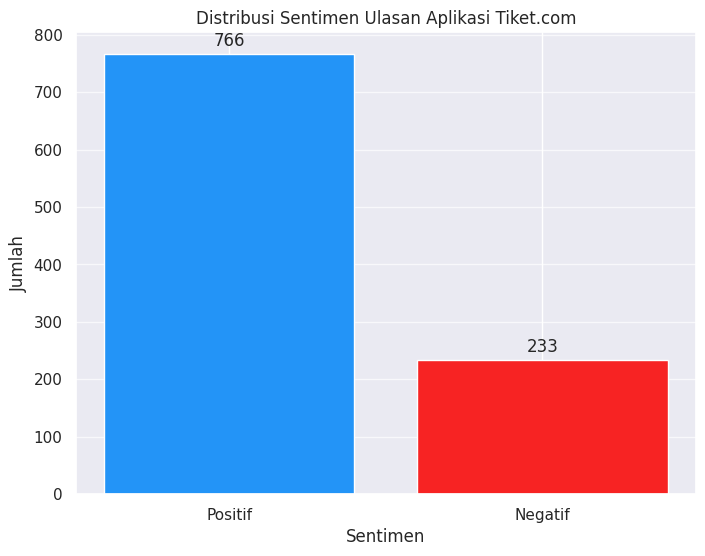

In [39]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Tiket.com")


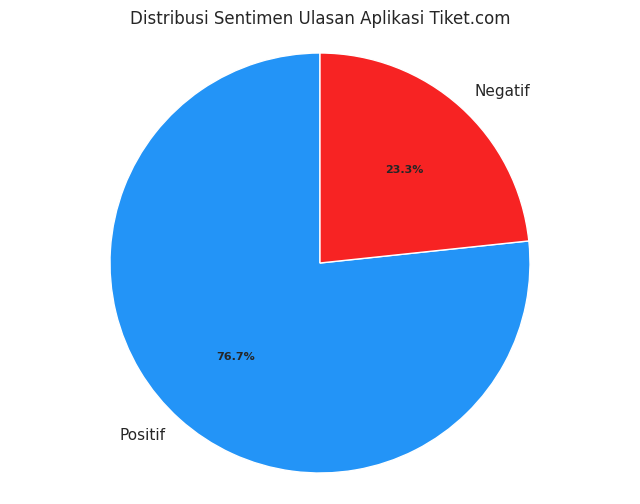

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Tiket.com")

In [41]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,baru instal aplilasi tapi tiba tiba suruh ngel...,"just install the aplilation, but suddenly you'...",1
3,baik,Okay.,0
5,mantap,Steady.,0
6,buat kurir shope expres cipondoh makmur tangge...,Make the shope expires cipondoh affluent tangg...,0
8,jangan instal aplikasi tipu aplikasi tanggung ...,Don't install an application. The application'...,1
...,...,...,...
1595,maskapai apa bagasi kg lion tpi tdk d masukin ...,Air airlines what's the trunk of lion but don'...,0
1596,naik citiling nyaman pilot proposional landing...,Up the comfortable citiling pilot proposal lan...,0
1599,keren tolong reschedule di laku kali,"fontcolor="" # FFFF00""cool fontcolor="" # FFFF00...",0
1600,bagusdi tinggaat bnyk promo,It's good to be around a lot of promos.,0


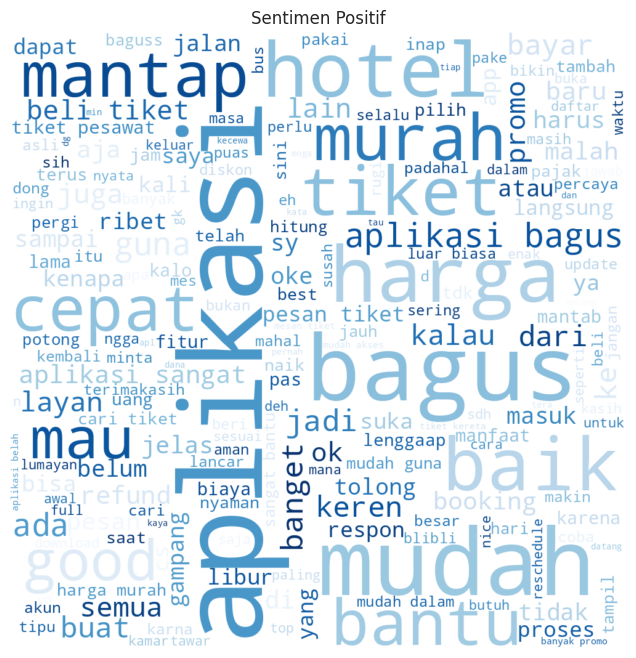

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

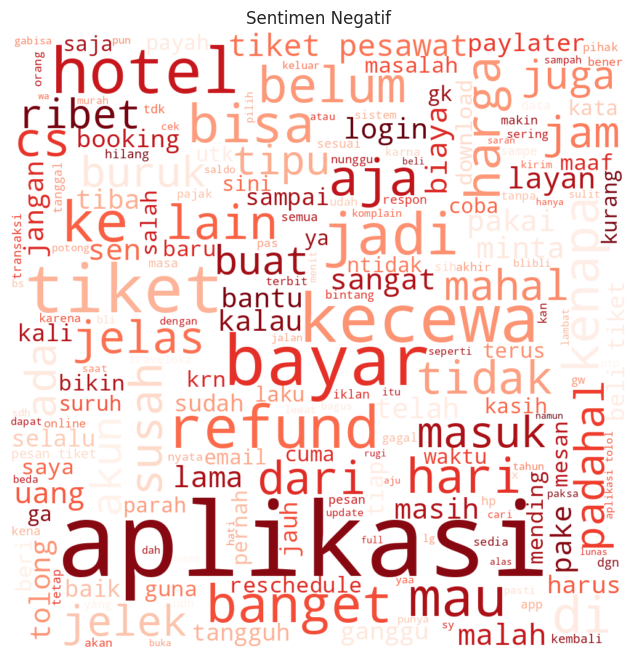

In [43]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

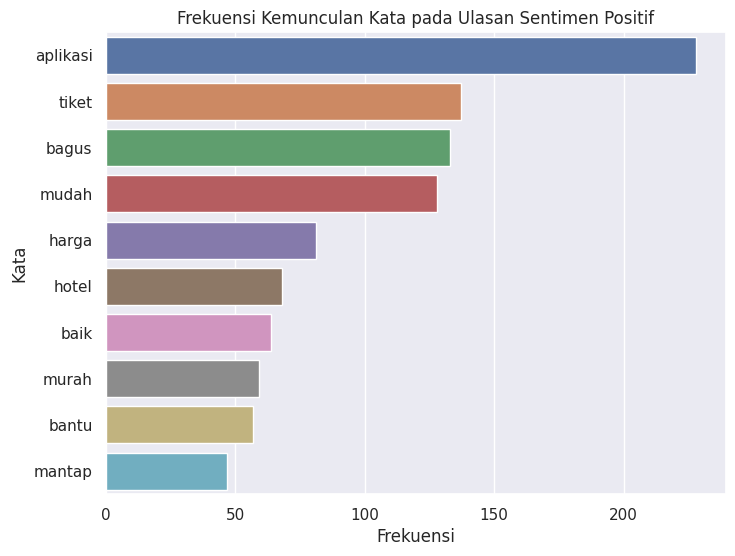

In [44]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [45]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
aplikasi        228
   tiket        137
   bagus        133
   mudah        128
   harga         81
   hotel         68
    baik         64
   murah         59
   bantu         57
  mantap         47


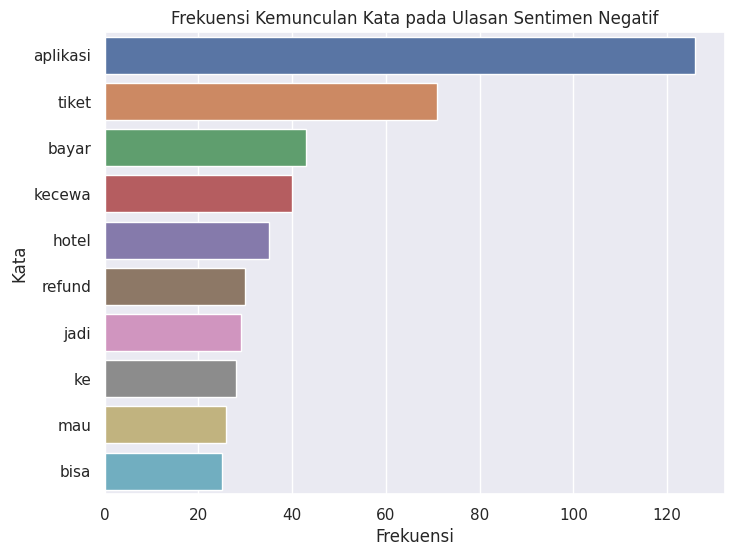

In [46]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [47]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
aplikasi        126
   tiket         71
   bayar         43
  kecewa         40
   hotel         35
  refund         30
    jadi         29
      ke         28
     mau         26
    bisa         25


In [48]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

sentimen
0    766
1    233
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [49]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

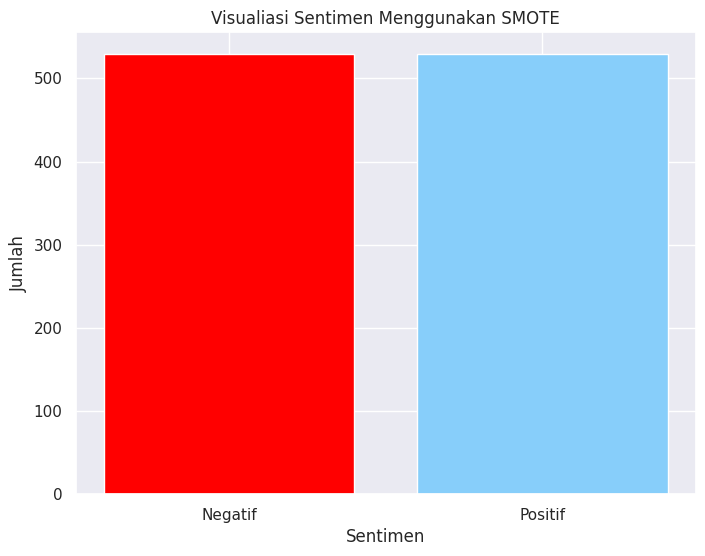

In [52]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [53]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [54]:
X_train_resampled.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33952309, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [55]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.81
Akurasi untuk c = 0.05: 0.8566666666666667
Akurasi untuk c = 0.25: 0.86
Akurasi untuk c = 0.5: 0.8566666666666667
Akurasi untuk c = 0.75: 0.8666666666666667
Akurasi untuk c = 1: 0.8633333333333333


In [56]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [57]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8633333333333333 


In [58]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.8633

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       237
           1       0.67      0.70      0.68        63

    accuracy                           0.86       300
   macro avg       0.79      0.80      0.80       300
weighted avg       0.87      0.86      0.86       300



In [59]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[215  22]
 [ 19  44]]

True Positives (TP) =  215

True Negatives (TN) =  44

False Positives (FP) =  22

False Negatives (FN) =  19

Accuracy =  0.8633333333333333


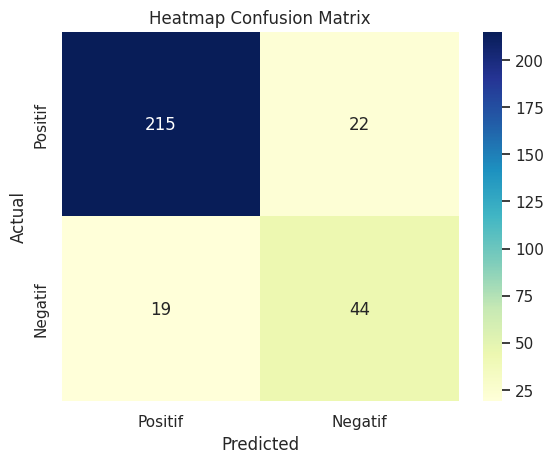

In [60]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [61]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [62]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8633


In [63]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1367


# **Testing**

In [64]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : sumpah kecewa bgt bener bener kecewa banget gunain aplikasi ini,, niatnya mau staycation jalan jalan jauh eh udah jauh jauh malah KODE BOOKING ID tidak sesuai sama pihak hotel.. pliss lah yang bener kalau kerja,, khawatirnya customer lain udah jauh jauh buat pesen hotel,, eh kode bookingnya ga ada bahkan berbeda malah di bilangnya dari aplikasi lain.. terus katanya gabisa di refund lagi, kebijakan apa itu.. saya sudah datangi hotel itu disuruh refund pas di refund malah gabisa,payah no solutif!
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 66.66%
Probabilitas: 66.66396911406277 %


In [65]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : aplikasi terbaik, keluhan diproses dengan sangat baik dan cepat
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 94.96%
Probabilitas: 94.96435430092897 %
